In [47]:
import os
import cv2
import numpy as np
import pandas as pd
import mahotas as mt
from matplotlib import pyplot as plt
%matplotlib inline


path = "Leaves"
files = os.listdir(path)
for file in os.listdir(path) :
    print(os.path.join(path,file))

Leaves\1001.jpg
Leaves\1002.jpg
Leaves\1003.jpg
Leaves\1004.jpg
Leaves\1005.jpg
Leaves\1006.jpg
Leaves\1007.jpg
Leaves\1008.jpg
Leaves\1009.jpg
Leaves\1010.jpg
Leaves\1011.jpg
Leaves\1012.jpg
Leaves\1013.jpg
Leaves\1014.jpg
Leaves\1015.jpg
Leaves\1016.jpg
Leaves\1017.jpg
Leaves\1018.jpg
Leaves\1019.jpg
Leaves\1020.jpg
Leaves\1021.jpg
Leaves\1022.jpg
Leaves\1023.jpg
Leaves\1024.jpg
Leaves\1025.jpg
Leaves\1026.jpg
Leaves\1027.jpg
Leaves\1028.jpg
Leaves\1029.jpg
Leaves\1030.jpg
Leaves\1031.jpg
Leaves\1032.jpg
Leaves\1033.jpg
Leaves\1034.jpg
Leaves\1035.jpg
Leaves\1036.jpg
Leaves\1037.jpg
Leaves\1038.jpg
Leaves\1039.jpg
Leaves\1040.jpg
Leaves\1041.jpg
Leaves\1042.jpg
Leaves\1043.jpg
Leaves\1044.jpg
Leaves\1045.jpg
Leaves\1046.jpg
Leaves\1047.jpg
Leaves\1048.jpg
Leaves\1049.jpg
Leaves\1050.jpg
Leaves\1051.jpg
Leaves\1052.jpg
Leaves\1053.jpg
Leaves\1054.jpg
Leaves\1055.jpg
Leaves\1056.jpg
Leaves\1057.jpg
Leaves\1058.jpg
Leaves\1059.jpg
Leaves\1060.jpg
Leaves\1061.jpg
Leaves\1062.jpg
Leaves\1

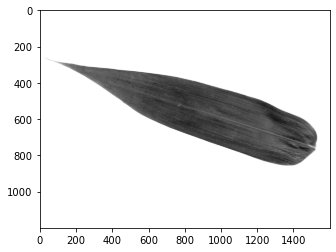

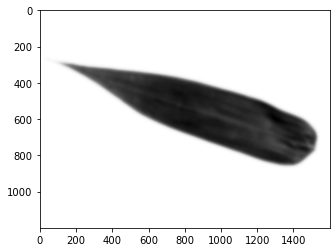

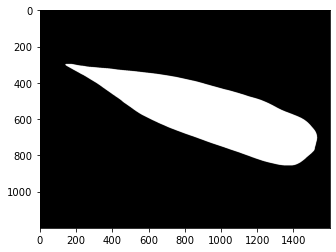

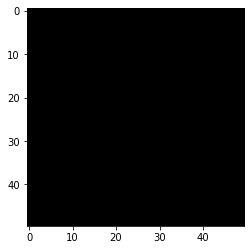

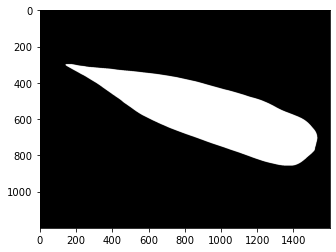

In [39]:
pathPhoto = "Leaves/1013.JPG"

original_img = cv2.imread(pathPhoto) # ucitavanje slike sa diska
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
plt.imshow(original_img)  # prikazivanje slike


img = cv2.resize(original_img, (1600, 1200))
plt.imshow(img,cmap="Greys_r")

# original_img = cv2.imread(pathPhoto)
# plt.imshow(original_img,cmap='Greys_r')
# plt.show()
# img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
# plt.imshow(img,cmap='Greys_r')
# plt.show()

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap='Greys_r')
plt.show()

blur = cv2.GaussianBlur(gray, (55,55),0)
plt.imshow(blur,cmap='Greys_r')
plt.show()

ret,otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu,cmap='Greys_r')
plt.show()

kernel = np.ones((50,50),np.uint8) 
plt.imshow(kernel,cmap='Greys_r')
plt.show()

closing = cv2.morphologyEx(otsu, cv2.MORPH_CLOSE, kernel) #mask
plt.imshow(closing,cmap='Greys_r')
plt.show()


# def find_contour(cnts):
#     contains = []
#     y_ri,x_ri, _ = img.shape
#     for cc in cnts:
#         yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
#         contains.append(yn)

#     val = [contains.index(temp) for temp in contains if temp>0]
#     print(contains)
#     return val[0]

# contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

# black_img = np.empty([1200,1600,3],dtype=np.uint8)
# black_img.fill(0)
# plt.imshow(black_img,cmap="Greys_r")

# index = find_contour(contours)
# cnt = contours[index]
# mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
# plt.imshow(mask)

# maskedImg = cv2.bitwise_and(img, mask)
# white_pix = [255,255,255]
# black_pix = [0,0,0]

# final_img = maskedImg
# h,w,channels = final_img.shape
# for x in range(0,w):
#     for y in range(0,h):
#         channels_xy = final_img[y,x]
#         if all(channels_xy == black_pix):    
#             final_img[y,x] = white_pix

# plt.imshow(final_img)
# plt.show()


In [40]:
contours, hierarchy = cv2.findContours(closing, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
len(contours)

cnt = contours[0]
len(cnt)

1592

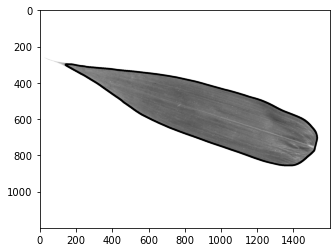

In [41]:
plottedContour = cv2.drawContours(gray,contours,-1,(0,255,0),10)
plt.imshow(plottedContour,cmap="Greys_r")

In [42]:
M = cv2.moments(cnt) #m00 - area
M

{'m00': 326101.0,
 'm10': 308537565.5,
 'm01': 186960671.0,
 'm20': 326412582007.0,
 'm11': 187659339928.25,
 'm02': 112750153656.5,
 'm30': 371659080486973.56,
 'm21': 206579483190887.84,
 'm12': 118821944451355.19,
 'm03': 71039548674820.3,
 'mu20': 34492504102.710266,
 'mu11': 10768161199.615448,
 'mu02': 5561606240.913284,
 'mu30': -2442838515749.125,
 'mu21': -936224635071.2227,
 'mu12': -202846044718.04297,
 'mu03': 20301103515.03125,
 'nu20': 0.32435490021337915,
 'nu11': 0.10125985173423256,
 'nu02': 0.05229931210346047,
 'nu30': -0.040226702379452285,
 'nu21': -0.015416995234239683,
 'nu12': -0.0033403057210351366,
 'nu03': 0.0003343022650939252}

In [43]:
perimeter = cv2.arcLength(cnt,True)
perimeter # obim, True - zatvorena kontura

3288.9830881357193

In [44]:
area = cv2.contourArea(cnt)
area

326101.0

In [59]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,
               1195,1267,1268,1323,1324,1385,1386,1437,
               1497,1551,1438,1496,2001,2050,2051,2113,
               2114,2165,2166,2230,2231,2290,2291,2346,
               2347,2423,2424,2485,2486,2546,2547,2612,
               2616,2675,3001,3055,3056,3110,3111,3175,
               3176,3229,3230,3281,3282,3334,3335,3389,
               3390,3446,3447,3510,3511,3563,3566,3621]
def find_species(file):
    target_num = int(file.split(".")[0])
    print(target_num)
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        print(i)
        target = int((i/2))
        print(target)
        return target # vraca redni br vrste [0,1...,31]

def create_dataset():
    names = ['species','area','perimeter','physiological_length','physiological_width','aspect_ratio', \
             'rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)
    species = find_species("1013.JPG") #prima naziv photografije "file"
     #Shape features
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area
       
        
    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0
        
    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)
        
    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)
        
        #Texture features
    textures = mt.features.haralick(gray)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]
        
    vector = [species,area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
              ]
    print(vector)
create_dataset()
#     df_temp = pd.DataFrame([vector],columns=names)
#     df = df.append(df_temp)
#     print(file)
#     return df

1013
0
0
[0, 326101.0, 3288.9830881357193, 1389, 558, 2.489247311827957, 2.3767544411087362, 33.17196130659757, 9.732555729166666, 23.086971354166668, 5.9583703125, 25.739689018119428, 50.91516930808582, 21.002124242520917, 101.61432194275339, 0.9889137494800558, 0.868056882131189, 2.4546217899316645]
